In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
recipes = pd.read_csv('/Users/spencerfogelman/Downloads/recipeData.csv', encoding = "ISO-8859-1")

In [3]:
print(recipes.shape)

(73861, 22)


In [4]:
print(recipes.describe())

             BeerID       StyleID       Size(L)            OG            FG  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean   36931.000000     60.179432     43.929775      1.406266      1.075865   
std    21321.978453     56.811462    180.373492      2.196908      0.432524   
min        1.000000      1.000000      1.000000      1.000000     -0.003000   
25%    18466.000000     10.000000     18.930000      1.051000      1.011000   
50%    36931.000000     35.000000     20.820000      1.058000      1.013000   
75%    55396.000000    111.000000     23.660000      1.069000      1.017000   
max    73861.000000    176.000000   9200.000000     34.034500     23.424600   

                ABV           IBU         Color      BoilSize      BoilTime  \
count  73861.000000  73861.000000  73861.000000  73861.000000  73861.000000   
mean       6.136865     44.276186     13.404989     49.724919     65.074870   
std        1.883510     42.945508     11.944511    

/Users/spencerfogelman/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [5]:
recipes.head()

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,...,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,...,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,...,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,...,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,...,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,...,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l


In [6]:
recipes.count()

BeerID           73861
Name             73860
URL              73861
Style            73265
StyleID          73861
Size(L)          73861
OG               73861
FG               73861
ABV              73861
IBU              73861
Color            73861
BoilSize         73861
BoilTime         73861
BoilGravity      70871
Efficiency       73861
MashThickness    43997
SugarScale       73861
BrewMethod       73861
PitchRate        34609
PrimaryTemp      51199
PrimingMethod     6766
PrimingAmount     4776
dtype: int64

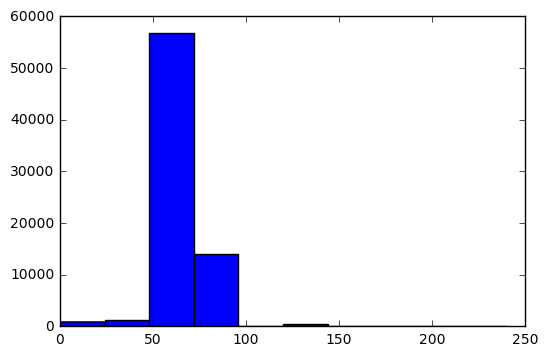

In [7]:
#Question1
plt.hist(recipes['BoilTime'])
plt.show()
#pros: see distribution of data
#cons: limited information besides distribution

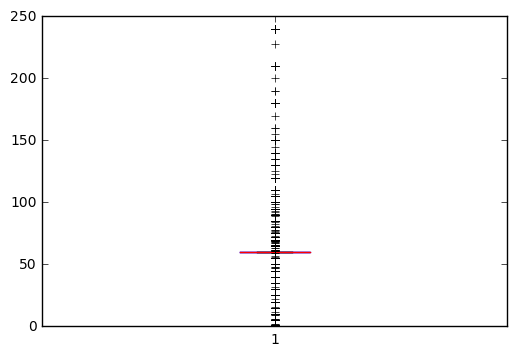

In [8]:
plt.boxplot(recipes['BoilTime'])
plt.show()
#pros: lots of quantitative information. Easy to compare two categories.
#cons: outliers screw up a boxplot

In [19]:
Q1 = np.percentile(recipes['BoilTime'], 25)
Q3 = np.percentile(recipes['BoilTime'], 75)
print(Q1, Q3)

60.0 60.0


In [20]:
def reject_outliers(point, q1, q3):
    iqr = q3 - q1
    if point < (q1 - 1.5 * iqr):
        return True
    elif point > (q3 + 1.5 * iqr):
        return True
    else:
        return False

In [16]:
reject_outliers(recipes['BoilTime'], 5)

True

0         True
1        False
2        False
3        False
4         True
5         True
6         True
7         True
8         True
9        False
10        True
11        True
12       False
13       False
14       False
15       False
16       False
17       False
18        True
19       False
20       False
21       False
22       False
23       False
24        True
25       False
26       False
27        True
28       False
29       False
         ...  
73831    False
73832    False
73833    False
73834    False
73835    False
73836    False
73837    False
73838    False
73839    False
73840    False
73841     True
73842    False
73843    False
73844    False
73845    False
73846    False
73847    False
73848    False
73849    False
73850    False
73851    False
73852    False
73853    False
73854    False
73855     True
73856    False
73857    False
73858     True
73859    False
73860    False
Name: BoilTime, dtype: bool


{'boxes': [<matplotlib.lines.Line2D at 0x11efbeb38>],
 'caps': [<matplotlib.lines.Line2D at 0x11efc4eb8>,
 'fliers': [<matplotlib.lines.Line2D at 0x11efcfe10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11efc9f28>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11efbed68>,
  <matplotlib.lines.Line2D at 0x11efc4d30>]}

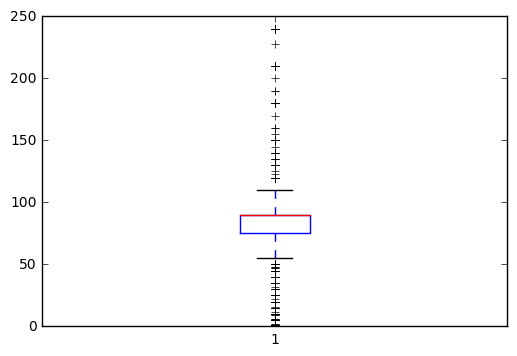

In [26]:
recipes_bool = recipes['BoilTime'].apply(lambda x: reject_outliers(x, Q1, Q3))
print(recipes_bool)
boiltime = recipes['BoilTime'][recipes_bool]
plt.boxplot(boiltime)

In [ ]:
def reject_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    iqr = Q3 - Q1
    for point in data:
        if point < (Q1 - 1.5 * iqr):
            point= np.nan
        if point > (Q3 + 1.5 * iqr):
            point= np.nan
    data = pd.DataFrame(data).dropna()
    return data   

In [13]:
boiltime = reject_outliers(recipes['BoilTime'])
print(boiltime.describe())
print(recipes['BoilTime'].describe())

           BoilTime
count  73861.000000
mean      65.074870
std       15.024228
min        0.000000
25%       60.000000
50%       60.000000
75%       60.000000
max      240.000000
count    73861.000000
mean        65.074870
std         15.024228
min          0.000000
25%         60.000000
50%         60.000000
75%         60.000000
max        240.000000
Name: BoilTime, dtype: float64


In [ ]:
print(len(recipes['BoilTime']))
norm= np.random.normal(0, 1, 73861)
norm.sort()
plt.plot(norm, recipes['BoilTime'].sort_values(), "o") 
plt.show() 
#pros: can compare a distribiton.
#cons: limited information. can do statistical test instead.

In [ ]:
sns.boxplot(recipes['BoilTime'])
plt.show()

In [ ]:
sns.distplot(recipes['BoilTime'])
plt.show()
#includes statistical information with histogram.

In [ ]:
recipes.columns

In [ ]:
recipes['Color'].unique()

In [ ]:
#Question 2
plt.scatter(recipes['Size(L)'], recipes['BoilTime'])
plt.show()
#pro: general trend of data. can strength of a correlation. can show influeence of outliers.
#con: points overlap very easily

In [ ]:
sns.jointplot(recipes['Size(L)'], recipes['BoilTime'])
plt.show()
#combines univariate and bivariate distributions.

In [ ]:
sns.jointplot(recipes['Size(L)'], recipes['BoilTime'], kind='hex', xlim=(0,1000))
plt.show()

In [ ]:
sns.lmplot(y='BoilTime', x='Size(L)', data=recipes, fit_reg=True, scatter_kws={'alpha':0.4})
plt.show()

In [ ]:
#Question 3
recipes.boxplot(column='BoilTime', by='BrewMethod')
plt.show()

In [ ]:
sns.barplot(x='BrewMethod', y='BoilTime', data=recipes)
plt.show()
#pro: can be used for ranking.
#con: size of the bar misleading.

In [ ]:
sns.stripplot(x='BrewMethod', y='BoilTime', data=recipes)
plt.show()
#pro: shows the actual data point.
#con: boxplot gives more information.

In [ ]:
sns.violinplot(x='BrewMethod', y='BoilTime', data=recipes)
plt.show()
#pro: visually appealing. gives more distribution information than boxplot.
#con: not easy to understand for people not in statistics.

In [ ]:
sns.pointplot(x='BrewMethod', y='BoilTime', data=recipes)
plt.show()
#pros: can use to show trends. shows error bars.

In [ ]:
sns.lvplot(x='BrewMethod', y='BoilTime', data=recipes)
plt.show()

In [ ]:
sns.pairplot(recipes)
plt.show()
#compares alot of stuff at once.